<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/quantum_cern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CERN: [International Conference on Quantum Technologies for High-Energy Physics](https://indico.cern.ch/event/1190278/)**

**Annalisa Pawlosky, PhD**, *Senior Research Scientist at Google*

[Google Scholar](https://scholar.google.com/citations?view_op=list_works&hl=de&user=rLeFKJgAAAAJ) $\cdot$ [LinkedIn](https://www.linkedin.com/in/annalisa-pawlosky-bb7579178/)

**Alexander Del Toro Barba, PhD**, *Quantum Computing Practice Lead at Google Cloud*

[Google Scholar](https://scholar.google.com/citations?hl=en&user=fddyK-wAAAAJ) $\cdot$ [LinkedIn](https://www.linkedin.com/in/deltorobarba/)


###### *Install Libraries*

*You can view this notebook shared publicly without sign-in. But in order to execute code, a Google account sign-in is required. Instructions to create a Google account are [here](https://support.google.com/accounts/answer/27441?hl=en).*

In [ ]:
!pip install cirq -q
import math
import sympy
import numpy as np
import seaborn as sns
import networkx as nx
from sympy import Matrix
from sympy.physics.quantum import TensorProduct
import matplotlib.pyplot as plt
import importlib, pkg_resources
import collections
import cirq
import cirq_google
from cirq.contrib.svg import SVGCircuit

###### *Complete Introductory Example*

 * Homepage: [quantumai.google/cirq](https://quantumai.google/cirq)

* Youtube video series: [Getting started with Cirq 1.0](https://www.youtube.com/watch?v=4OQrPHmjpVc&list=PLpO2pyKisOjLVt_tDJ2K6ZTapZtHXPLB4)

* See following notebook and many more information [here](https://quantumai.google/cirq/start/basics)

In [ ]:
# Create Vanilla Qubits
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")
c = cirq.NamedQubit("c")

qubits = cirq.LineQubit.range(3)

# Create Operation
ops=[cirq.X(a),
     cirq.CCNOT(a,b, c),
     cirq.measure(a),
     cirq.measure(b),
     cirq.measure(c)]
circuit=cirq.Circuit(ops)
print(circuit)

a: ───X───@───M───
          │
b: ───────@───M───
          │
c: ───────X───M───


Measurement results: a=1111111111
b=0000000000
c=0000000000


Counter({1: 10})

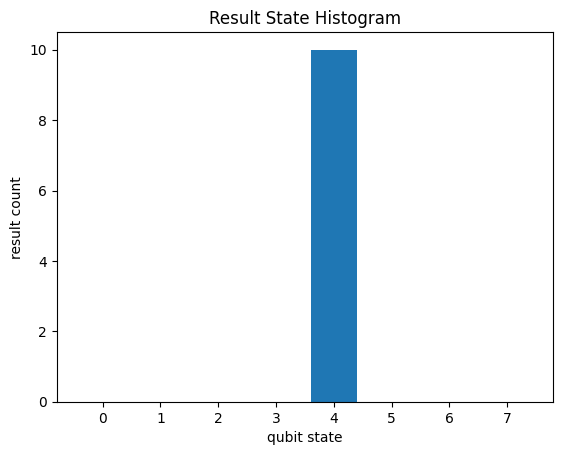

In [ ]:
# Run Simulation, Measure and Visualize
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=10)
print('Measurement results:', result) # 0: 00, 1: 01, 2: 10, 3: 11 etc
_ = cirq.vis.plot_state_histogram(result, plt.subplot())
result.histogram(key="a")

In [ ]:
# Pick a qubit.
qubit = cirq.GridQubit(0, 0)

# Create a circuit
circuit = cirq.Circuit(
    cirq.X(qubit)**0.5,  # Square root of NOT.
    cirq.measure(qubit, key='m')  # Measurement.
)
print("Circuit:")
print(circuit)

# Simulate the circuit several times.
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=20)
print("Results:")
print(result)

Circuit:
(0, 0): ───X^0.5───M('m')───
Results:
m=01101010001011001100


###### *Qubits*

The first part of creating a quantum circuit is to define a set of qubits (also known as a quantum register) to act on. [Cirq has three main ways of defining qubits](https://quantumai.google/cirq/build/qubits):

* **cirq.NamedQubit**: used to label qubits by an abstract name.
* **cirq.LineQubit**: qubits labelled by number in a linear array.
* **cirq.GridQubit**: qubits labelled by two numbers in a rectangular lattice.

In [ ]:
# Using named qubits can be useful for abstract algorithms
# as well as algorithms not yet mapped onto hardware.
q0 = cirq.NamedQubit('source')
q1 = cirq.NamedQubit('target')

# Line qubits can be created individually
q3 = cirq.LineQubit(3)

# Or created in a range
# This will create LineQubit(0), LineQubit(1), LineQubit(2)
q0, q1, q2 = cirq.LineQubit.range(3)

# Grid Qubits can also be referenced individually
q4_5 = cirq.GridQubit(4, 5)

# Or created in bulk in a square
# This will create 16 qubits from (0,0) to (3,3)
qubits = cirq.GridQubit.square(4)

In [ ]:
qubits

[cirq.GridQubit(0, 0),
 cirq.GridQubit(0, 1),
 cirq.GridQubit(0, 2),
 cirq.GridQubit(0, 3),
 cirq.GridQubit(1, 0),
 cirq.GridQubit(1, 1),
 cirq.GridQubit(1, 2),
 cirq.GridQubit(1, 3),
 cirq.GridQubit(2, 0),
 cirq.GridQubit(2, 1),
 cirq.GridQubit(2, 2),
 cirq.GridQubit(2, 3),
 cirq.GridQubit(3, 0),
 cirq.GridQubit(3, 1),
 cirq.GridQubit(3, 2),
 cirq.GridQubit(3, 3)]

There are also pre-packaged sets of qubits called [Devices](https://quantumai.google/cirq/hardware/devices). These are qubits along with a set of rules for how they can be used.

A cirq.Device can be used to ensure that two-qubit gates are only applied to qubits that are adjacent in the hardware, and other constraints. The following example will use the cirq_google.Sycamore device that comes with cirq. It is a diamond-shaped grid with 54 qubits that mimics early hardware released by Google.

![sycamore](https://4.bp.blogspot.com/-b9akad6ismU/WpmyaJo-cYI/AAAAAAAACa8/mCqPBJxv5oUivy6Jq42FSOQYkeRlTmkiwCLcBGAs/s1600/image1.png)

In [ ]:
my_device = cirq_google.Sycamore
print(my_device)

                                             (0, 5)───(0, 6)
                                             │        │
                                             │        │
                                    (1, 4)───(1, 5)───(1, 6)───(1, 7)
                                    │        │        │        │
                                    │        │        │        │
                           (2, 3)───(2, 4)───(2, 5)───(2, 6)───(2, 7)───(2, 8)
                           │        │        │        │        │        │
                           │        │        │        │        │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)───(3, 6)───(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │        │        │        │        │
                  │        │        │        │        │        │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)───(4, 6)───(4, 7)───(4, 8)───(4, 9)
         │        │        │        │        │        │   

###### *Gates and Operations*

* A Gate is an effect that can be applied to a set of qubits.

* An Operation is a gate applied to a set of qubits.

For instance, cirq.H is the quantum Hadamard and is a Gate object. cirq.H(cirq.LineQubit(1)) is an Operation object and is the Hadamard gate applied to a specific qubit (line qubit number 1).

Many textbook gates are included within cirq. cirq.X, cirq.Y, and cirq.Z refer to the single-qubit Pauli gates. cirq.CZ, cirq.CNOT, cirq.SWAP are a few of the common two-qubit gates. cirq.measure is a macro to apply a MeasurementGate to a set of qubits. You can find more, as well as instructions on how to create your own custom gates, on the [Gates documentation](https://quantumai.google/cirq/build/gates) page.

In [ ]:
# Example gates
cnot_gate = cirq.CNOT
pauli_z = cirq.Z

# Use exponentiation to get square root gates.
sqrt_x_gate = cirq.X**0.5

# Some gates can also take parameters
sqrt_sqrt_y = cirq.YPowGate(exponent=0.25)

# Create two qubits at once, in a line.
q0, q1 = cirq.LineQubit.range(2)

# Example operations
z_op = cirq.Z(q0)
not_op = cirq.CNOT(q0, q1)
sqrt_iswap_op = cirq.SQRT_ISWAP(q0, q1)

# You can also use the gates you specified earlier.
cnot_op = cnot_gate(q0, q1)
pauli_z_op = pauli_z(q0)
sqrt_x_op = sqrt_x_gate(q0)
sqrt_sqrt_y_op = sqrt_sqrt_y(q0)

###### *Circuits and moments*

You are now ready to construct a quantum circuit. A Circuit is a collection of Moments.

A Moment is a collection of Operations that all act during the same abstract time slice. Each Operation must be applied to a disjoint set of qubits compared to each of the other Operations in the Moment. A Moment can be thought of as a vertical slice of a quantum circuit diagram.

![moments](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1212.png)


<font color="blue">**Tensor-Multiplication (Kronecker) for combination of operators within one moment** *Two systems being described as a joint system*

> $\left[\begin{array}{ll}a & b \\ c & d\end{array}\right] \otimes\left[\begin{array}{ll}e & f \\ g & h\end{array}\right]=\left[\begin{array}{lll}a\left[\begin{array}{ll}e & f \\ g & h\end{array}\right] & b\left[\begin{array}{ll}e & f \\ g & h\end{array}\right] \\ c\left[\begin{array}{ll}e & f \\ g & h\end{array}\right] & d\left[\begin{array}{llll}e & f \\ g & h\end{array}\right]\end{array}\right]=\left[\begin{array}{llll}a e & a f & \text { be } & b f \\ a g & a h & b g & b h \\ c e & c f & d e & d f \\ c g & c h & d g & d h\end{array}\right]$

Example with Pauli X and Pauli Y gate

> $Y \otimes X=\left[\begin{array}{cc}0 & -i \\ i & 0\end{array}\right] \otimes\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right]=\left[\begin{array}{ll}0\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right] & -i\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right] \\ i\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right] & 0\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right]\end{array}\right]=\left[\begin{array}{cccc}0 & 0 & 0 & -i \\ 0 & 0 & -i & 0 \\ 0 & i & 0 & 0 \\ i & 0 & 0 & 0\end{array}\right]$


In [ ]:
m1 = Matrix([[1],[0]])
m2 = Matrix([[1],[0]])
m3 = Matrix([[1],[0]])

matrix = TensorProduct(m1, m2, m3)
matrix

Matrix([
[1],
[0],
[0],
[0],
[0],
[0],
[0],
[0]])

**<font color="blue">Usual Matrix-Multiplication for serially wired gates** *A line in the circuit is considered as a quantum wire and basically represents a single qubit. The product of operators keeps the same dimension*


![ggg](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Serially_wired_quantum_logic_gates.png/500px-Serially_wired_quantum_logic_gates.png)

Putting the Pauli X gate after the Pauli Y gate (both act on a single qubit) can be described as a single combined gate C:

>$C = X \cdot Y=\left[\begin{array}{ll}
0 & 1 \\
1 & 0
\end{array}\right] \cdot\left[\begin{array}{cc}
0 & -i \\
i & 0
\end{array}\right]=\left[\begin{array}{cc}
i & 0 \\
0 & -i
\end{array}\right]
$

>$
X \cdot X=\left(\begin{array}{ll}
0 & 1 \\
1 & 0
\end{array}\right)\left(\begin{array}{ll}
0 & 1 \\
1 & 0
\end{array}\right)=\left(\begin{array}{ll}
1 & 0 \\
0 & 1
\end{array}\right)=I
$

Circuits can be constructed in several different ways. By default, Cirq will attempt to slide your operation into the earliest possible Moment when you insert it. You can use the append function in two ways:

By appending each operation one-by-one:

In [ ]:
circuit = cirq.Circuit()

qubits = cirq.LineQubit.range(4)

circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.H(qubits[1]))
circuit.append(cirq.H(qubits[2]))
circuit.append(cirq.H(qubits[3]))


print(circuit)

0: ───H───

1: ───H───

2: ───H───

3: ───H───


Or by appending some iterable of operations. A preconstructed list works:

In [ ]:
circuit = cirq.Circuit()

ops = [cirq.H(q) for q in cirq.LineQubit.range(4)]

circuit.append(ops)

print(circuit)

0: ───H───

1: ───H───

2: ───H───

3: ───H───


A generator that yields operations also works. This syntax will be used often in documentation, and works both with the cirq.Circuit() initializer and the cirq.Circuit.append() function (for example used in Phase Estimation to append inverse Quantum Fourier Transform)

In [ ]:
# Append with generator

circuit = cirq.Circuit()
circuit.append(cirq.H(q) for q in cirq.LineQubit.range(4))
print(circuit)

0: ───H───

1: ───H───

2: ───H───

3: ───H───


In [ ]:
# Initializer with generator

print(cirq.Circuit(cirq.H(q) for q in cirq.LineQubit.range(4)))

0: ───H───

1: ───H───

2: ───H───

3: ───H───


In [ ]:
"""Creating a circuit."""

# Define three qubits.
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")
c = cirq.NamedQubit("c")

# Define a list of operations.
ops = [cirq.H(a),
       cirq.H(b),
       cirq.CNOT(b, c),
       cirq.H(b)]

# Create a circuit from the list of operations.
circuit = cirq.Circuit(ops)

print("Circuit:\n")
print(circuit)

Circuit:

a: ───H───────────

b: ───H───@───H───
          │
c: ───────X───────


If your operations are applied to the same qubits, they will be put in sequential, insertion-ordered moments. In the following example, the two-qubit gates overlap, and are placed in consecutive moments.

In [ ]:
print(cirq.Circuit(cirq.SWAP(q, q + 1) for q in cirq.LineQubit.range(3)))

0: ───×───────────
      │
1: ───×───×───────
          │
2: ───────×───×───
              │
3: ───────────×───


Sometimes, you may not want Cirq to automatically shift operations all the way to the left. To construct a circuit without doing this, you can create the circuit moment-by-moment or use a different InsertStrategy, explained more in the [Circuit documentation](https://quantumai.google/cirq/build/circuits)



In [ ]:
# Creates each gate in a separate moment by passing an iterable of Moments instead of Operations.
print(cirq.Circuit(cirq.Moment([cirq.H(q)]) for q in cirq.LineQubit.range(3)))

0: ───H───────────

1: ───────H───────

2: ───────────H───


###### *Circuits and devices*

One important consideration when using real quantum devices is that there are often constraints on circuits that are able to be run on the hardware. Device objects specify these constraints and can be used to validate your circuit to make sure that it contains no illegal operations. For more information on what constraints Device objects can specify and how to use them, see the [Devices page](https://quantumai.google/cirq/hardware/devices).

The following example demonstrates this with the Sycamore Device:

In [ ]:
# Create some qubits.
q0 = cirq.GridQubit(5, 6)
q1 = cirq.GridQubit(5, 5)
q2 = cirq.GridQubit(4, 5)

# Create operations using the Sycamore gate, which is supported by the Sycamore device.
# However, create operations for both adjacent and non-adjacent qubit pairs.
adjacent_op = cirq_google.SYC(q0, q1)
nonadjacent_op = cirq_google.SYC(q0, q2)

# A working circuit for the Sycamore device raises no issues.
working_circuit = cirq.Circuit()
working_circuit.append(adjacent_op)
valid = cirq_google.Sycamore.validate_circuit(working_circuit)

# A circuit using invalid operations.
bad_circuit = cirq.Circuit()
bad_circuit.append(nonadjacent_op)
try:
    cirq_google.Sycamore.validate_circuit(bad_circuit)
except ValueError as e:
    print(e)

Qubit pair is not valid on device: (cirq.GridQubit(5, 6), cirq.GridQubit(4, 5)).


###### *Simulation*

The results of the application of a quantum circuit can be calculated by a Simulator. Cirq comes bundled with a simulator that can calculate the results of circuits up to about a limit of 20 qubits. It can be initialized with [cirq.Simulator()](https://quantumai.google/reference/python/cirq/Simulator).

There are two different approaches to using a simulator:

* **simulate():** When classically simulating a circuit, a simulator can directly access and view the resulting wave function. This is useful for debugging, learning, and understanding how circuits will function.

* **run():** When using actual quantum devices, we can only access the end result of a computation and must sample the results to get a distribution of results. Running the simulator as a sampler mimics this behavior and only returns bit strings as output.

Next simulate a 2-qubit "Bell State":

In [ ]:
# Create a circuit to generate a Bell State:
# 1/sqrt(2) * ( |00⟩ + |11⟩ )

bell_circuit = cirq.Circuit()

q0, q1 = cirq.LineQubit.range(2)

bell_circuit.append(cirq.H(q0))
bell_circuit.append(cirq.CNOT(q0, q1))

# Initialize Simulator
s = cirq.Simulator()
results = s.simulate(bell_circuit)

print('Simulate the circuit:')
print(results)

# For sampling, we need to add a measurement at the end
bell_circuit.append(cirq.measure(q0, q1, key='result'))

# Sample the circuit
samples = s.run(bell_circuit, repetitions=1000)

Simulate the circuit:
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: 0.707|00⟩ + 0.707|11⟩

phase:
output vector: |⟩


**Virtual Machine Simulation**

Cirq also provides the [Quantum Virtual Machine](https://quantumai.google/cirq/simulate/quantum_virtual_machine), which is a simulated virtual version of quantum hardware devices. It consists of two primary components:

1. A virtual [Engine interface](https://quantumai.google/cirq/simulate/virtual_engine_interface) that enables you to verify and run circuits with the same interface that quantum hardware would have.

2. A set of noise models that try to realistically replicate the noise present in actual Google quantum hardware devices.

The QVM is intended to serve as a replacement for the Google quantum hardware, in two cases:

1. Running your circuit on a QVM can give an approximation of how your circuit runs under the influence of hardware-like noise. This can be useful to help you reconfigure or change your circuit to be less impacted by noise when run on actual quantum hardware.

2. During the preparation process before running your circuit(s) on hardware, you can seamlessly use a QVM to test that your workflow or pipeline works before eventually switching to the nearly-identical hardware interface.

Read more about the QVM and its uses in the [Quantum Virtual Machine page](https://quantumai.google/cirq/simulate/quantum_virtual_machine), or just start using it with the [QVM Creation Template page](https://quantumai.google/cirq/simulate/qvm_builder_code).

###### *Visualizing Results*

When you use run() to get a sample distribution of measurements, you can directly graph the simulated samples as a histogram:



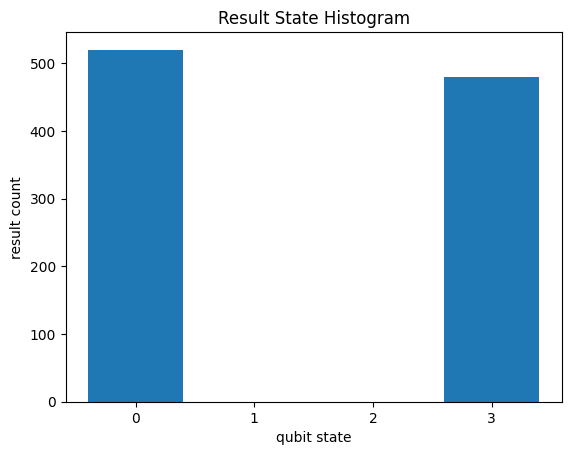

In [ ]:
cirq.vis.plot_state_histogram(samples, plt.subplot())
plt.show()

However, this histogram has some empty qubit states, which may become problematic if you work with more qubits. To graph sparse sampled data, first get the Counts from your results with its histogram() function, and pass that to cirq.plot_state_histogram. By collecting the results into counts, all the qubit states that were never seen are ignored.

In [ ]:
# Pull of histogram counts from the result data structure
counts = samples.histogram(key='result')
print(counts)

Counter({0: 520, 3: 480})


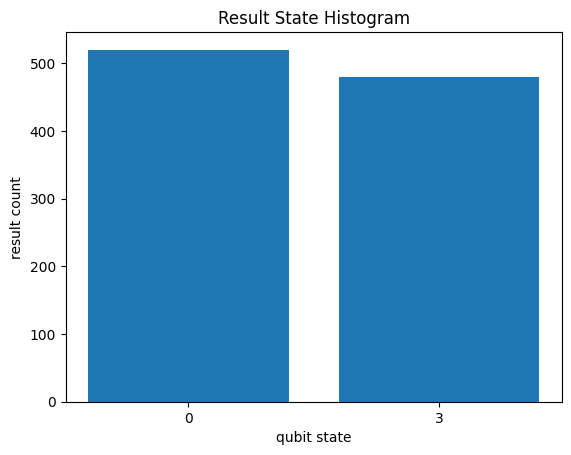

In [ ]:
# Graph the histogram counts instead of the results
cirq.vis.plot_state_histogram(counts, plt.subplot())
plt.show()

A histogram over the states that were actually observed can often be more useful when analyzing results. To learn more about the available options for creating result histograms, see the [State Histograms](https://quantumai.google/cirq/simulate/state_histograms) page.



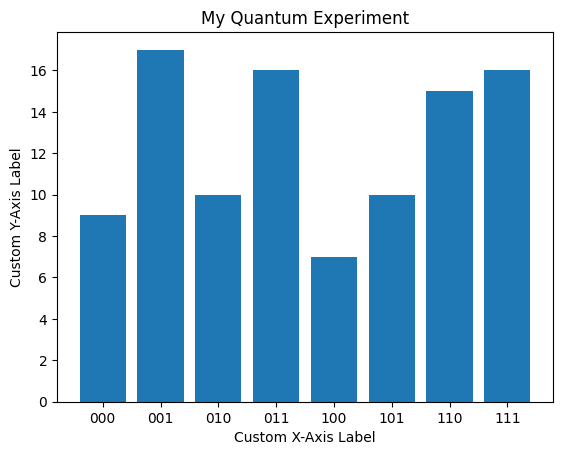

In [ ]:
def binary_labels(num_qubits):
    return [bin(x)[2:].zfill(num_qubits) for x in range(2 ** num_qubits)]

q = cirq.LineQubit.range(3)
circuit = cirq.Circuit([cirq.H.on_each(*q), cirq.measure(*q)])
result = cirq.Simulator().run(circuit, repetitions=100)
_ = cirq.vis.plot_state_histogram(result, plt.subplot(), title = 'My Quantum Experiment', xlabel = 'Custom X-Axis Label', ylabel = 'Custom Y-Axis Label', tick_label=binary_labels(3))
plt.show()

###### *Using Parameter Sweeps*

Cirq circuits allow for gates to have symbols as free parameters within the circuit. This is especially useful for variational algorithms, which vary parameters within the circuit in order to optimize a cost function, but it can be useful in a variety of circumstances.

For parameters, Cirq uses the library sympy to add sympy.Symbol as parameters to gates and operations.

Once the circuit is complete, you can fill in the possible values of each of these parameters with a Sweep. There are several possibilities that can be used as a sweep:

* [**cirq.Points**](https://quantumai.google/reference/python/cirq/Points): A list of manually specified values for one specific symbol as a sequence of floats.
* [**cirq.Linspace**](https://quantumai.google/reference/python/cirq/Linspace): A linear sweep from a starting value to an ending value.
* [**cirq.ListSweep**](https://quantumai.google/reference/python/cirq/ListSweep): A list of manually specified values for several different symbols, specified as a list of dictionaries.
* [**cirq.Zip**](https://quantumai.google/reference/python/cirq/Zip) and [**cirq.Product**](https://quantumai.google/reference/python/cirq/Product): Sweeps can be combined list-wise by zipping them together or through their Cartesian product.

A parameterized circuit and sweep together can be run using the simulator or other sampler by changing run() to run_sweep() and adding the sweep as a parameter.

Here is an example of sweeping an exponent of a X gate:

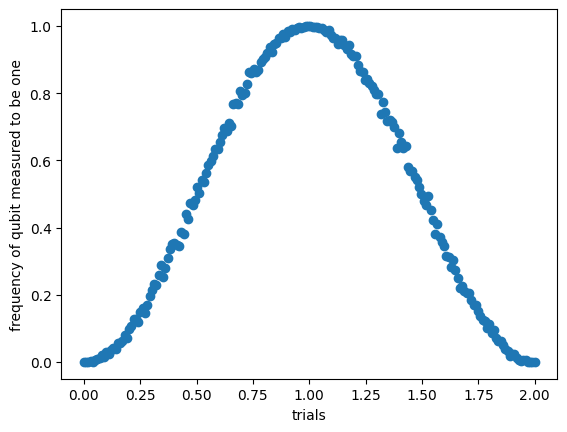

In [ ]:
# Perform an X gate with variable exponent
q = cirq.GridQubit(1, 1)
circuit = cirq.Circuit(cirq.X(q) ** sympy.Symbol('t'), cirq.measure(q, key='m'))

# Sweep exponent from zero (off) to one (on) and back to two (off)
param_sweep = cirq.Linspace('t', start=0, stop=2, length=200)

# Simulate the sweep
s = cirq.Simulator()
trials = s.run_sweep(circuit, param_sweep, repetitions=1000)

# Plot all the results
x_data = [trial.params['t'] for trial in trials]
y_data = [trial.histogram(key='m')[1] / 1000.0 for trial in trials]
plt.scatter('t', 'p', data={'t': x_data, 'p': y_data})
plt.xlabel("trials")
plt.ylabel("frequency of qubit measured to be one")
plt.show()

###### *Decompositions*

Many gates can be decomposed into an equivalent circuit with simpler operations and gates. This is called decomposition and can be accomplished with the [cirq.decompose](https://quantumai.google/reference/python/cirq/decompose) protocol.

For instance, a Hadamard H gate can be decomposed into X and Y gates:

In [ ]:
print(cirq.decompose(cirq.H(cirq.LineQubit(0))))

[(cirq.Y**0.5).on(cirq.LineQubit(0)), cirq.XPowGate(global_shift=-0.25).on(cirq.LineQubit(0))]


Another example is the 3-qubit Toffoli gate, which is equivalent to a controlled-controlled-X gate. Many devices do not support three qubit gates, so it is important to decompose them into one and two qubit gates.

In [ ]:
q0, q1, q2 = cirq.LineQubit.range(3)
print(cirq.Circuit(cirq.decompose(cirq.TOFFOLI(q0, q1, q2))))

0: ───T────────────────@─────────────────────────────────@─────────────────────────────@────────────────────────────@───────────────────────────────────────
                       │                                 │                             │                            │
1: ───T───────Y^-0.5───@───Y^0.5────@───T^-1────Y^-0.5───@────────Y^0.5───@───Y^-0.5───@──────Y^0.5────@───Y^-0.5───@──────Y^0.5────@───────────────────────
                                    │                                     │                            │                            │
2: ───Y^0.5───X────────T───Y^-0.5───@───Y^0.5───T────────Y^-0.5───────────@───Y^0.5────T^-1───Y^-0.5───@───Y^0.5────T^-1───Y^-0.5───@───Y^0.5───Y^0.5───X───


The above decomposes the Toffoli into a simpler set of one-qubit gates and two-qubit CZ gates at the cost of lengthening the circuit considerably.



###### *Example: Quantum Fourier Transform*

* <font color="blue">$e^{2\pi i}$ = 1</font> (identity operation), and see why $e^{\pi i}$ = -1

* In QFT we change the <font color="blue">$\theta$ = phase in $e^{2\pi i \theta}$</font> = Eigenvalue of Oracle function $U$ associated with an eigenvector |u⟩

* The phase $\theta$ is expressed as: <font color="blue">$\theta$ = $\frac{x_n}{2^{k_n}}$</font> with:

  * <font color="blue">$x_n$ = 0 or 1</font> state
  
  * <font color="blue">$k_n$</font> number of Qubits

* This is expressed in a so-called "controlled-R quantum gate" that **applies a relative phase change to |1>**

* The matrix form of this operator is: <font color="blue">$\hat{R}_{k}=\left(\begin{array}{cc}1 & 0 \\ 0 & e^{2 \pi i \frac{x_n}{ 2^{k_n}}}\end{array}\right)$</font>

**Circuit Construction**

*Compare the equations above with the circuit activations below (how a circuits computes the results). For example for the first qubit the operator / gate $S$ = 90° rotation is only activated if the second qubit $x_2$ is in state 1. Here it is not activated because $x_2$ = 0:*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_0812.png)

*Quantum Fourier Transform with 3 Qubits for $|001\rangle$*

**Computational Basis in $|001\rangle$**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_0804.png)

**Fourier Basis for $|001\rangle$**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_0805.png)

**Computational States:** <font color="blue">$\tilde{x_1}$ = 0</font>, <font color="blue">$\tilde{x_2}$ = 0</font>, <font color="blue">$\tilde{x_3}$ = 1</font>. Number of Qubits: <font color="blue">$k_1$ = 1 qubit, $k_2$ = 2 qubits, $k_3$ = 3 qubits</font>

> <font color="blue">Qubit 1 = $\tilde{x_1}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2^{k_1}}+\frac{x_{2}}{2^{k_2}}+\frac{x_{3}}{2^{k_3}}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{0}{2}+\frac{0}{4}+\frac{1}{8}\right)}|1\rangle\right)$  = <font color="blue">$\frac{\pi i}{4}$</font> (45° T-rotation)

> <font color="blue">Qubit 2 = $\tilde{x_2}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{2}}{2^{k_1}}+\frac{x_{3}}{2^{k_2}}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{0}{2}+\frac{1}{4}\right)}|1\rangle\right)$ = <font color="blue">$\frac{\pi i}{2}$</font> (90° S-rotation)

> <font color="blue">Qubit 3 = $\tilde{x_3}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{3}}{2^{k_1}}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i} \frac{1}{2}}|1\rangle\right)$ = $e^{\pi i 1} =$ <font color="blue">$-1$</font> (180° Z-rotation)

*Example: Quantum Fourier Transform with 3 Qubits: Introduction*

**Computational Basis States:** <font color="blue">$\tilde{x_1}$ = 0 or 1</font>, <font color="blue">$\tilde{x_2}$ = 0 or 1</font>, <font color="blue">$\tilde{x_3}$ = 0 or 1</font>. Number of Qubits: <font color="blue">$k_1$ = 1, $k_2$ = 2, $k_3$ = 3</font>

> <font color="blue">$\tilde{x_1}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2^{k_1}}+\frac{x_{2}}{2^{k_2}}+\frac{x_{3}}{2^{k_3}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2^1}+\frac{x_{2}}{2^2}+\frac{x_{3}}{2^3}\right)}|1\rangle\right)$  = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$

* If only $\tilde{x_1}$ is activated, then it is a 180° Z-rotation of $\pi$ radians = -1

* If only $\tilde{x_2}$ is activated, then it is a 90° S-rotation of $\frac{\pi}{2}$ radians = i

* If only $\tilde{x_3}$ is activated, then it is a 45° T-rotation of $\frac{\pi}{4}$ radians = between 1 and i

> <font color="blue">$\tilde{x_2}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_2}{2^{k_1}}+\frac{x_3}{2^{k_2}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_2}{2^1}+\frac{x_3}{2^2}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_2}{2}+\frac{x_3}{4}\right)}|1\rangle\right)$

* If only $\tilde{x_2}$ is activated, then it is a 180° Z-rotation of $\pi$ radians = -1

* If only $\tilde{x_3}$ is activated, then it is a 90° S-rotation of $\frac{\pi}{2}$ radians = i

* If both $\tilde{x_2}$ and $\tilde{x_3}$ are activated, then it is a 180° + 90° = 170° rotation of $\pi + \frac{\pi}{2}$ radians = -i

> <font color="blue">$\tilde{x_3}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_3}{2^{k_1}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_3}{2^1}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}x_3}|1\rangle\right)$

* If $\tilde{x_3}$ is activated, then it is a 180° Z-rotation of $\pi$ radians = -1


In [ ]:
def make_qft(qubits):

    # Generate list of qubits
    qreg = list(qubits)

    # Make sure list is longer than 0 qubits:
    while len(qreg) > 0:

    # Remove first qubit from list and return its value (set as head-qubit):
        q_head = qreg.pop(0)

    # Apply Hadamard superposition to this head-qubit
        yield cirq.H(q_head)

    # Enumerate through list with i (index position) and corresponding qubit value (0 or 1)
        for i, qubit in enumerate(qreg):

    # Apply Controlled-Z * Theta-Phase-Shift on target ('q-head') if control-qubit ('qubit') is in state 1
            yield (cirq.CZ ** (1 / 2 ** (i + 1)))(qubit, q_head)

    # Iterating through until "while len(qreg) = 0", then processes stops

"""Visually check the QFT circuit."""
qubits = cirq.LineQubit.range(17)
qft = cirq.Circuit(make_qft(qubits))
print(qft)

                   ┌───────┐   ┌────────────┐   ┌───────────────┐   ┌───────────────────┐   ┌──────────────────────┐   ┌──────────────────────────┐   ┌─────────────────────────────┐   ┌─────────────────────────────────┐   ┌────────────────────────────────────┐   ┌────────────────────────────────────┐   ┌───────────────────────────────────────┐   ┌───────────────────────────────────────┐   ┌──────────────────────────────────────────┐   ┌──────────────────────────────────────────┐   ┌─────────────────────────────────────────────┐   ┌──────────────────────────────────────────┐   ┌──────────────────────────────────────────┐   ┌───────────────────────────────────────┐   ┌───────────────────────────────────────┐   ┌────────────────────────────────────┐   ┌────────────────────────────────────┐   ┌─────────────────────────────────┐   ┌─────────────────────────────┐   ┌──────────────────────────┐   ┌──────────────────────┐   ┌───────────────────┐   ┌───────────────┐   ┌────────────┐   ┌───────┐

https://quantumai.google/cirq/experiments/textbook_algorithms#quantum_fourier_transform

###### *Quantum Phase Estimation*

**Quantum phase estimation addresses the following problem:**

* We have a $n$-qubit oracle function $U$, encoded in the form of a controlled- $U$ unitary.

* $U$ has an eigenvalue $e^{2 \pi i \phi}$, associated with an eigenvector $|u\rangle$ which we can prepare.

> <font color="red">**We wish to estimate the phase, $\phi$, of the eigenvalue to $t$ bits of precision.**

> <font color="blue">**Given a unitary operator $U$, the algorithm estimates $\theta$ in $U|\psi\rangle=e^{2 \pi i \theta}|\psi\rangle$** $\quad$ (based on Eigenvalue equation)</font>

* Here $|\psi\rangle$ is an eigenvector / eigenstate and $e^{2 \pi i \theta}$ is the corresponding eigenvalue.


As an application of our quantum Fourier transform circuit, we'll implement the phase estimation algorithm. The phase estimation algorithm estimates the eigenvalues of a unitary operator and uses the inverse QFT as a subroutine. The total circuit that we are going to implement is shown below.



In [ ]:
"""Set up the unitary and number of bits to use in phase estimation."""
# Value of θ which appears in the definition of the unitary U above.
# Try different values.
theta = 0.234

# Define the unitary U.
U = cirq.Z ** (2 * theta)

# Accuracy of the estimate for theta. Try different values.
n_bits = 3

In [ ]:
"""Build the first part of the circuit for phase estimation."""
# Get qubits for the phase estimation circuit.
qubits = cirq.LineQubit.range(n_bits)
u_bit = cirq.NamedQubit('u')

# Build the first part of the phase estimation circuit.
phase_estimator = cirq.Circuit(cirq.H.on_each(*qubits))

for i, bit in enumerate(qubits):
    phase_estimator.append(cirq.ControlledGate(U).on(bit, u_bit) ** (2 ** (n_bits - i - 1)))

print(phase_estimator)

0: ───H───@──────────────────────────────
          │
1: ───H───┼──────────@───────────────────
          │          │
2: ───H───┼──────────┼─────────@─────────
          │          │         │
u: ───────Z^-0.128───Z^0.936───Z^0.468───


In [ ]:
"""Build the last part of the circuit (inverse QFT) for phase estimation."""
# Do the inverse QFT.
phase_estimator.append(make_qft_inverse(qubits[::-1]))

# Add measurements to the end of the circuit
phase_estimator.append(cirq.measure(*qubits, key='m'))
print(phase_estimator)

                                         ┌────────┐
0: ───H───@──────────H─────────@──────────@────────────────────────M('m')───
          │                    │          │                        │
1: ───H───┼──────────@─────────@^-0.5─────┼──────H────@────────────M────────
          │          │                    │           │            │
2: ───H───┼──────────┼─────────@──────────@^-0.25─────@^-0.5───H───M────────
          │          │         │
u: ───────Z^-0.128───Z^0.936───Z^0.468──────────────────────────────────────
                                         └────────┘


In [ ]:
"""Set the input state of the eigenvalue register."""
# Add gate to change initial state to |1>.
phase_estimator.insert(0, cirq.X(u_bit))

print(phase_estimator)

                                         ┌────────┐
0: ───H───@──────────H─────────@──────────@────────────────────────M('m')───
          │                    │          │                        │
1: ───H───┼──────────@─────────@^-0.5─────┼──────H────@────────────M────────
          │          │                    │           │            │
2: ───H───┼──────────┼─────────@──────────@^-0.25─────@^-0.5───H───M────────
          │          │         │
u: ───X───Z^-0.128───Z^0.936───Z^0.468──────────────────────────────────────
                                         └────────┘


In [ ]:
"""Simulate the circuit and convert from measured bit values to estimated θ values."""
# Simulate the circuit.
sim = cirq.Simulator()
result = sim.run(phase_estimator, repetitions=10)

# Convert from output bitstrings to estimate θ values.
theta_estimates = np.sum(2 ** np.arange(n_bits) * result.measurements['m'], axis=1) / 2**n_bits
print(theta_estimates)

[0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25]


Real value theta = 0.234

Complete example: Here is a solution that just consists of what we did in previous cells all put together.



In [ ]:
def phase_estimation(theta, n_bits, n_reps=10, prepare_eigenstate_gate=cirq.X):
    # Define qubit registers.
    qubits = cirq.LineQubit.range(n_bits)
    u_bit = cirq.NamedQubit('u')

    # Define the unitary U.
    U = cirq.Z ** (2 * theta)

    # Start with Hadamards on every qubit.
    phase_estimator = cirq.Circuit(cirq.H.on_each(*qubits))

    # Do the controlled powers of the unitary U.
    for i, bit in enumerate(qubits):
        phase_estimator.append(cirq.ControlledGate(U).on(bit, u_bit) ** (2 ** (n_bits - 1 - i)))

    # Do the inverse QFT.
    phase_estimator.append(make_qft_inverse(qubits[::-1]))

    # Add measurements.
    phase_estimator.append(cirq.measure(*qubits, key='m'))

    # Gate to choose the initial state for the u_bit. Placing X here chooses the |1> state.
    phase_estimator.insert(0, prepare_eigenstate_gate.on(u_bit))

    # Code to simulate measurements
    sim = cirq.Simulator()
    result = sim.run(phase_estimator, repetitions=n_reps)

    # Convert measurements into estimates of theta
    theta_estimates = np.sum(2**np.arange(n_bits)*result.measurements['m'], axis=1)/2**n_bits

    return theta_estimates

Now we can easily examine the accuracy of the estimate vs n_bits. We do so for a variety of values for n_bits in the following cell.



In [ ]:
"""Analyze convergence vs n_bits."""
# Set the value of theta. Try different values.
theta = 0.123456

max_nvals = 16
nvals = np.arange(1, max_nvals, step=1)

# Get the estimates at each value of n.
estimates = []
for n in nvals:
    estimate = phase_estimation(theta=theta, n_bits=n, n_reps=1)[0]
    estimates.append(estimate)

And now we make a plot of the $\theta$ estimates vs. the number of bits.

<ipython-input-38-a29f61d5db4e>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


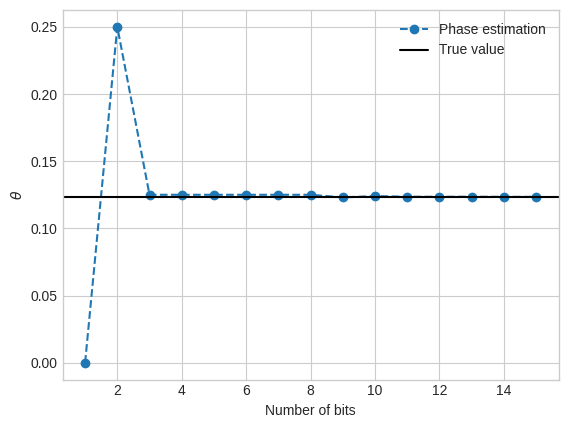

In [ ]:
"""Plot the results."""
plt.style.use("seaborn-whitegrid")

plt.plot(nvals, estimates, "--o", label="Phase estimation")
plt.axhline(theta, label="True value", color="black")

plt.legend()
plt.xlabel("Number of bits")
plt.ylabel(r"$\theta$");

https://quantumai.google/cirq/experiments/textbook_algorithms#phase_estimation

###### *Hadamard gate*

*Hadamard Gate (Superposition)*

> $H=\frac{1}{\sqrt{2}}\left(\begin{array}{cc}1 & 1 \\ 1 & -1\end{array}\right)$

**The Hadamard states ∣+⟩ and ∣−⟩ are considered superposition states**

because they are a combination of the two computational states:

> $|\pm\rangle=\frac{1}{\sqrt{2}}|0\rangle \pm \frac{1}{\sqrt{2}}|1\rangle$

**Apply Hadamard gate on a qubit that is in the |0> state**:

> <font color="blue">$\frac{1}{\sqrt{2}}\left(\begin{array}{cc}1 & 1 \\ 1 & -1\end{array}\right)\left[\begin{array}{l}1 \\ 0\end{array}\right]=\frac{1}{\sqrt{2}}\left[\begin{array}{l}1 \\ 1\end{array}\right]$

The qubit enters a new state where the probability of measuring 0 is:

* $\left(\frac{1}{\sqrt{2}}\right)^{2}=\frac{1}{2}$

And the probability of measuring 1 is also:

* $\left(\frac{1}{\sqrt{2}}\right)^{2}=\frac{1}{2}$

**Now apply Hadamard gate on a qubit that is in the |1> state**:

> <font color="blue">$\frac{1}{\sqrt{2}}\left(\begin{array}{cc}1 & 1 \\ 1 & -1\end{array}\right)\left[\begin{array}{l}0 \\ 1\end{array}\right]=\frac{1}{\sqrt{2}}\left[\begin{array}{l}1 \\ -1\end{array}\right]$

The qubit enters a new state where the probability of measuring 0 is:

* $\left(\frac{1}{\sqrt{2}}\right)^{2}=\frac{1}{2}$

And the probability of measuring 1 is also:

* $\left(\frac{-1}{\sqrt{2}}\right)^{2}=\frac{1}{2}$

Hence, in both cases (qubit |0> or qubit |1>) applying a Hadamard Gate gives an equal chance for the qubit to be 0 or 1' when measured.

Source: https://freecontent.manning.com/all-about-hadamard-gates/

**Herleitung Hadamard (Wichtig!)**

For an equal (or uniform) superposition of the two computational states, we can set the two coefficients equal to each other:

$a_{1}=a_{2}=a$

The normalization condition for a well-behaved quantum state requires that the sum of the squared magnitudes of the coefficients be equal to one; this is sufficient to find
a
a for a uniform superposition:

$|a|^{2}+|a|^{2}=1$

$2|a|^{2}=1$

$|a|^{2}=\frac{1}{2}$

$a=\frac{1}{\sqrt{2}}$

In vector form, this state can represented as

> $\left[\begin{array}{l}\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}\end{array}\right]$ = $\frac{1}{\sqrt{2}}$ $\left[\begin{array}{c} 1 \\ 0 \end{array}\right]$ + $\frac{1}{\sqrt{2}}$ $\left[\begin{array}{c} 0 \\ 1 \end{array}\right]$

This is what we can use now to understand Hadamard, where you want "halfway" a 50/50 chance of basis states 0 and 1 (Bloch sphere representation of superposition state):

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_025.jpg)

*Hadamard gate operations:*

> $\begin{aligned} H(|0\rangle) &=\frac{1}{\sqrt{2}}|0\rangle+\frac{1}{\sqrt{2}}|1\rangle=:|+\rangle \\ H(|1\rangle) &=\frac{1}{\sqrt{2}}|0\rangle-\frac{1}{\sqrt{2}}|1\rangle=:|-\rangle \\ H\left(\frac{1}{\sqrt{2}}|0\rangle+\frac{1}{\sqrt{2}}|1\rangle\right) &=\frac{1}{2}(|0\rangle+|1\rangle)+\frac{1}{2}(|0\rangle-|1\rangle)=|0\rangle \\ H\left(\frac{1}{\sqrt{2}}|0\rangle-\frac{1}{\sqrt{2}}|1\rangle\right) &=\frac{1}{2}(|0\rangle+|1\rangle)-\frac{1}{2}(|0\rangle-|1\rangle)=|1\rangle \end{aligned}$

One application of the Hadamard gate to either a 0 or 1 qubit will produce a quantum state that, if observed, **will be a 0 or 1 with equal probability** (as seen in the first two operations). This is exactly like flipping a fair coin in the standard probabilistic model of computation. However, if the Hadamard gate is applied twice in succession (as is effectively being done in the last two operations), then the final state is always the same as the initial state (because quantum operations are reversable, unlike operations on classical computers).